In [1]:
import sys
print(sys.version)

3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]


In [8]:
import os 
os.system('sudo pip install scikit-learn')

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

#import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like
#from pandas import pandas_datareader as pdr
import matplotlib
from matplotlib import pyplot as plt
import datetime
import numpy as np

In [50]:
#Building the dataset

companies_dict = {
    
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds': 'MCD',
    'Intel': 'INTC',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electric': 'GE',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mistubishi': 'MSBHY',
    'Sony': 'SNE',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC'}

companies = sorted(companies_dict.items(), key = lambda x:x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electric', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mistubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO')]


In [51]:
#Defining which online source to use to pull the stock values from

data_source = 'yahoo'
start_date = '2015-01-01'
end_date = '2017-12-31'
panel_data = DataReader(list(companies_dict.values()),
 data_source,start_date,end_date)

In [52]:
#Finding Stock Open and Close Data Values

#stock_close = panel_data.loc['Close']
#stock_open = panel_data.loc['Open']

#print(stock_close.iloc[0])



print(panel_data.head())
print(panel_data.columns)
#panel_data.drop(['labels'], 0)
print(panel_data.columns)
x, y = panel_data.shape
print("{} x {}".format(x, y))

Attributes   Adj Close                                                  \
Symbols           AMZN        AAPL         NOC          BA         LMT   
Date                                                                     
2014-12-31  310.350006  101.178932  135.503754  112.812035  167.326874   
2015-01-02  308.519989  100.216454  134.648788  112.786011  167.969910   
2015-01-05  302.190002   97.393181  131.807983  112.004875  164.476837   
2015-01-06  295.290009   97.402374  132.534271  110.685638  163.703476   
2015-01-07  298.420013   98.768150  136.726562  112.404106  165.814987   

Attributes                                                          ...  \
Symbols           MCD       INTC        NAV         IBM        TXN  ...   
Date                                                                ...   
2014-12-31  81.070152  31.409779  33.480000  127.949593  46.593407  ...   
2015-01-02  80.689468  31.470366  34.160000  129.241516  46.602119  ...   
2015-01-05  79.798302  31.115505

In [53]:
#panel_data.reshape(len(companies_dict))
panel_data_close = [panel_data.iloc[i].loc['Close'] for i in range(0, x)]
stock_close = np.array(panel_data_close).T 
row, column = stock_close.shape
#stock_open = panel_data.loc['Open']
print(stock_close.shape)


(25, 756)


In [54]:
panel_data_open = [panel_data.iloc[i].loc['Open'] for i in range(0, x)]
stock_open = np.array(panel_data_open).T 
print(stock_open.shape)

(25, 756)


In [56]:
movements = np.zeros([row, column])

for i in range(0, row):
        movements[i, :] = np.subtract(stock_close[i, :], stock_open[i,:])
        
for i in range(0, len(companies)):
    print("Company {} moved {}".format(companies[i][0], sum(movements[i][:])))

Company Apple moved -83.93020629882812
Company Amazon moved 14.249893188476562
Company American Express moved 72.03007507324219
Company Boeing moved 100.44984436035156
Company Bank of America moved 57.899932861328125
Company Chevron moved 51.290016174316406
Company Ford moved 19.52003288269043
Company General Electric moved -0.6599926948547363
Company Honda moved 15.669967651367188
Company IBM moved 28.409912109375
Company Intel moved 23.569869995117188
Company Johnson & Johnson moved 28.480026245117188
Company Coca Cola moved 4.509649276733398
Company Lockheed Martin moved 5.600105285644531
Company MasterCard moved 36.96997833251953
Company McDonalds moved 11.459976196289062
Company Mistubishi moved 30.619949340820312
Company Microsoft moved -17.430099487304688
Company Navistar moved -8.180000305175781
Company Northrop Grumman moved 30.440019607543945
Company Pepsi moved -0.4999885559082031
Company Sony moved 27.099990844726562
Company Toyota moved 29.399993896484375
Company Texas Ins

(25, 756)


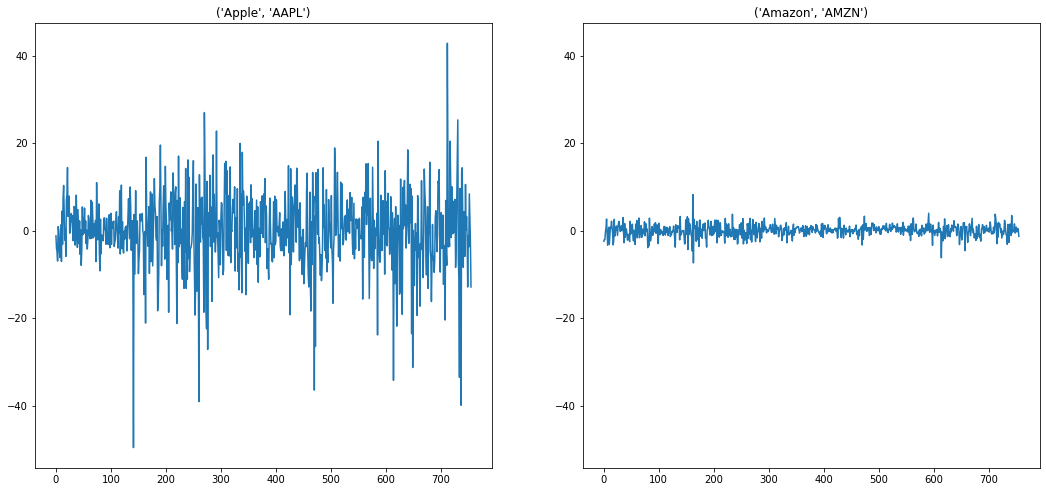

In [57]:
print(movements.shape)

#Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18, 18))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [58]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

print(norm_movements.max())
print(norm_movements.min())
print(norm_movements.mean())

0.26029795916062815
-0.259844372052625
0.0010710305004875064


(25, 756)


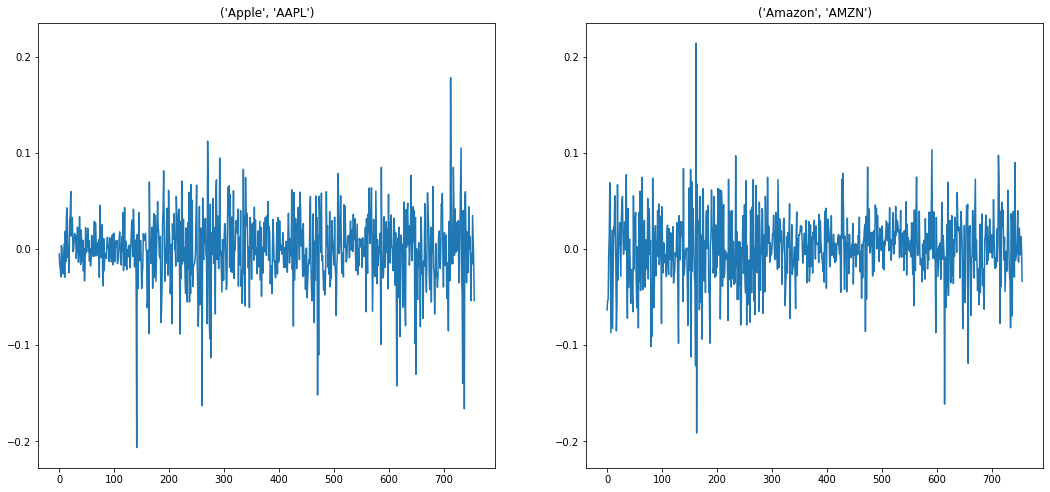

In [60]:


print(norm_movements.shape)

#Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18, 18))
ax1 = plt.subplot(221)
plt.plot(norm_movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(norm_movements[1][:])
plt.title(companies[1])
plt.show()



In [62]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans# Define a normalizer

normalizer = Normalizer()# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

In [66]:
df = pd.DataFrame({'labels': labels, 'companies': companies})
print(df.sort_values('labels'))

    labels                 companies
14       0          (MasterCard, MA)
15       0          (McDonalds, MCD)
1        1            (Amazon, AMZN)
6        1                 (Ford, F)
8        1              (Honda, HMC)
9        1                (IBM, IBM)
24       2      (Valero Energy, VLO)
7        2    (General Electric, GE)
13       2    (Lockheed Martin, LMT)
2        3   (American Express, AXP)
3        3              (Boeing, BA)
4        3    (Bank of America, BAC)
19       4   (Northrop Grumman, NOC)
20       5              (Pepsi, PEP)
18       5           (Navistar, NAV)
17       5         (Microsoft, MSFT)
12       5           (Coca Cola, KO)
23       5  (Texas Instruments, TXN)
22       6              (Toyota, TM)
21       7               (Sony, SNE)
11       8  (Johnson & Johnson, JNJ)
10       8             (Intel, INTC)
0        8             (Apple, AAPL)
5        9            (Chevron, CVX)
16       9       (Mistubishi, MSBHY)


In [69]:
from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()# Reduce the data
reduced_data = PCA(n_components = 2)# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)# Fit pipeline to daily stock movements
pipeline.fit(movements)# Prediction
labels = pipeline.predict(movements)# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)
print(df2.sort_values('labels'))

    labels          companies
22       0      Valero Energy
19       0         Mistubishi
18       0              Honda
8        0                IBM
13       0   American Express
17       0             Toyota
5        1          McDonalds
16       1  Johnson & Johnson
1        2              Apple
9        2  Texas Instruments
10       2         MasterCard
11       2          Microsoft
23       3               Ford
24       3    Bank of America
7        3           Navistar
21       4            Chevron
12       4   General Electric
4        5    Lockheed Martin
2        5   Northrop Grumman
0        6             Amazon
14       7              Pepsi
15       7          Coca Cola
3        8             Boeing
6        9              Intel
20       9               Sony


<Figure size 432x288 with 0 Axes>

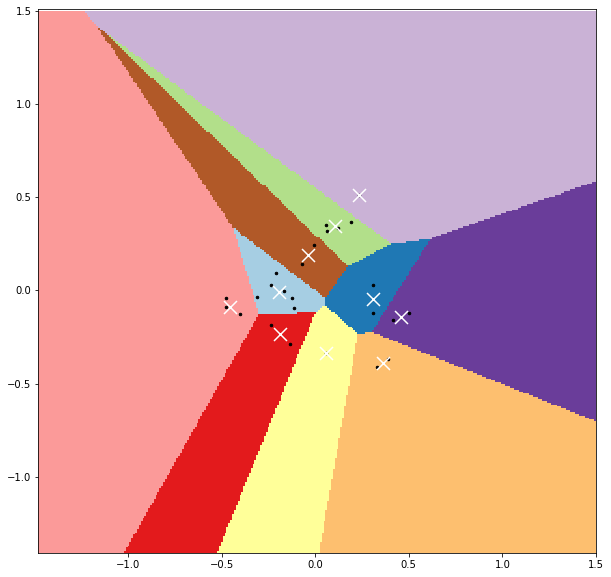

In [75]:
from sklearn.decomposition import PCA

# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()